In [53]:
import numpy as np
from matplotlib import pyplot as plt
import statfin

In [2]:
StatFin = statfin.StatFin()

In [3]:
menot_tbl = StatFin.ktutk._14pg
menot_df = menot_tbl.query(Vuosi=2022)("ktutk")
menot_df["yht"] = menot_df.kulu_kt_hk_1_1 # Kulutusmenot vuodessa
menot_df["yks"] = menot_df.kulu_kt_hk_2_1 # Kulutusmenot kulutusyksikköä kohden vuodessa
menot_df = menot_df[["Kulutusmenot", "Tuloviidennes", "yht", "yks"]]

In [4]:
tausta_tbl = StatFin.ktutk._14qa
tausta_df = tausta_tbl.query(Vuosi="2022")("ktutk_t")
tausta_df["N"] = tausta_df.pklkm_sum           # Kotitalouksia perusjoukossa
tausta_df["sz"] = tausta_df.jlkm_mean          # Kotitalouden keskikoko
tausta_df["oecd"] = tausta_df.oecdmod_mean     # Kulutusyksikköjä keskimäärin
tausta_df["tulot"] = tausta_df.Kaytetmk_1_mean # Käytettävissä olevat tulot
tausta_df = tausta_df[["Tuloviidennes", "N", "sz", "oecd", "tulot"]]

In [56]:
CAT_0 = ("12", "041", "042", "062", "063", "064", "12", "77", "99")
CAT_10 = ("0972",)
CAT_14 = ("01", "11", "061", "073", "09461")

In [76]:
menot = lambda x: menot_df[menot_df.Kulutusmenot == x].yht[1:].to_numpy()

t = tausta_df.tulot[1:].to_numpy()
s = t - menot("042")

AMT_0 = np.sum([menot(x) for x in CAT_0], axis=0)
AMT_10 = np.sum([menot(x) for x in CAT_10], axis=0)
AMT_14 = np.sum([menot(x) for x in CAT_14], axis=0)
AMT_25_5 = t - AMT_0 - AMT_10 - AMT_14

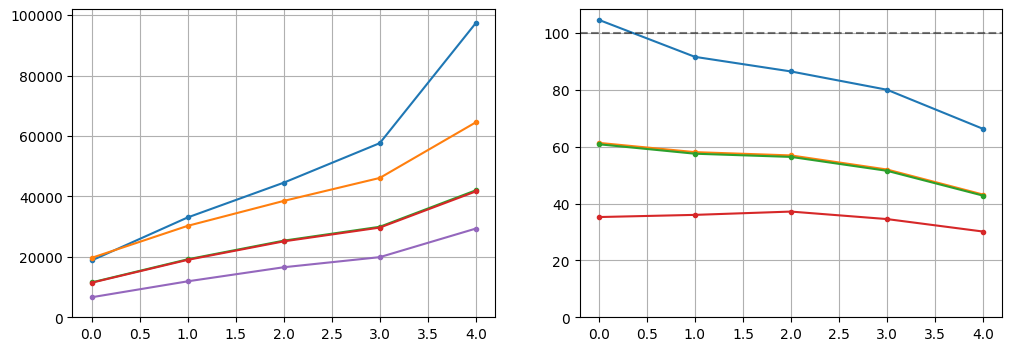

In [77]:
y = [menot("0")]
y.append(y[-1] - AMT_0)
y.append(y[-1] - AMT_10)
y.append(y[-1] - AMT_14)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
ax.plot(t, marker=".")
for y_ in y:
    ax.plot(y_, marker=".")
ax.set_ylim(0, None)
ax.grid()

ax = axs[1]
for y_ in y:
    ax.plot(100 * y_ / t, marker=".")
ax.set_ylim(0, None)
ax.axhline(100, color="k", linestyle="--", alpha=0.5)
ax.grid()

plt.show()

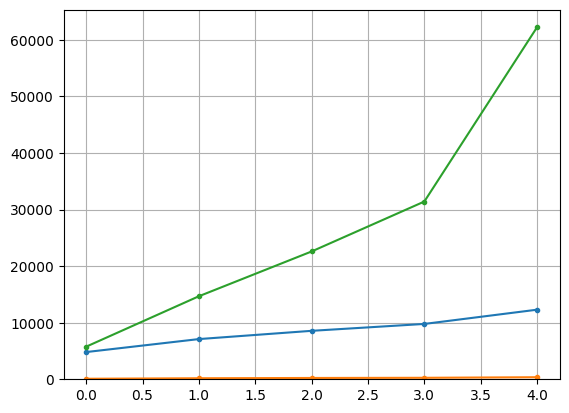

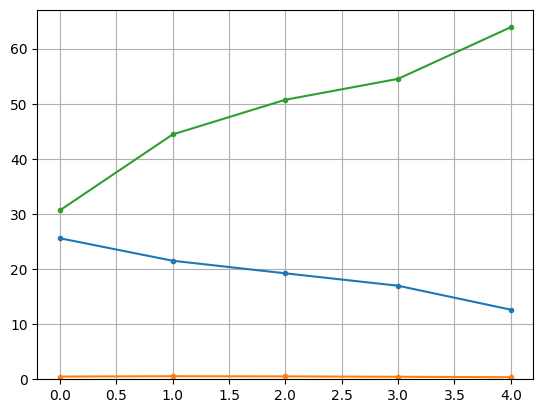

In [83]:
plt.plot(AMT_14, marker=".")
plt.plot(AMT_10, marker=".")
plt.plot(AMT_25_5, marker=".")
plt.ylim(0, None)
plt.grid()
plt.show()

plt.plot(100 * AMT_14 / t, marker=".")
plt.plot(100 * AMT_10 / t, marker=".")
plt.plot(100 * AMT_25_5 / t, marker=".")
plt.ylim(0, None)
plt.grid()